# Analyzing Relative Performance of Different DP Methods

## Activate Project and Import Functions

In [1]:
] activate ..

  Activating project at `~/Documents/Class/ThAlgs/Edist`


In [2]:
using Edist, BenchmarkTools
import Plots, Random

[ Info: Precompiling Edist [1954abc1-49cc-48ca-8c28-a859a096cc20]


## Read FASTA Input Data

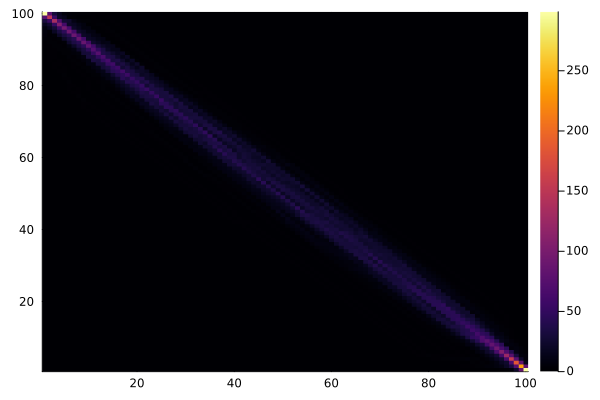

In [4]:
seq = get_fasta("../data/TP53_cross_species.fasta");
Full.visualize("../data/TP53_cross_species.fasta")

## Compare Running Time and Memory Usage

In [4]:
@benchmark score(Bounded, seq[1], seq[2])

BenchmarkTools.Trial: 390 samples with 1 evaluation.
 Range (min … max):  10.956 ms …  14.918 ms  ┊ GC (min … max): 0.00% … 4.23%
 Time  (median):     12.245 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   12.826 ms ± 977.552 μs  ┊ GC (mean ± σ):  1.81% ± 3.20%

                  ██▆                                           
  ▂▁▁▁▁▁▁▁▁▁▁▁▂▃▄▇█████▅▅▃▃▂▂▁▁▂▂▃▁▄▅▅▄▃▂▃▁▂▁▂▁▃▃▇▆▄▃▂▂▃▃▄▆▄▅▃ ▃
  11 ms           Histogram: frequency by time         14.8 ms <

 Memory estimate: 18.84 MiB, allocs estimate: 8.

In [5]:
@benchmark score(Full, seq[1], seq[2])

BenchmarkTools.Trial: 212 samples with 1 evaluation.
 Range (min … max):  22.092 ms … 26.256 ms  ┊ GC (min … max): 0.00% … 14.77%
 Time  (median):     22.494 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   23.578 ms ±  1.667 ms  ┊ GC (mean ± σ):  5.28% ±  6.81%

    ▂▅█▃▁                                                 ▁    
  ▄▇█████▇▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▂▁▄▇▆▇█▆▆ ▃
  22.1 ms         Histogram: frequency by time        26.2 ms <

 Memory estimate: 34.17 MiB, allocs estimate: 2.

In [6]:
@benchmark align(Hirschberg, seq[1], seq[2])

BenchmarkTools.Trial: 147 samples with 1 evaluation.
 Range (min … max):  33.053 ms … 40.322 ms  ┊ GC (min … max): 0.00% … 16.32%
 Time  (median):     33.513 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   34.013 ms ±  1.677 ms  ┊ GC (mean ± σ):  1.44% ±  4.36%

   ▁▇█▄                                                        
  ▅████▇▇▃▂▃▃▁▃▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▃▃▂▃▃ ▂
  33.1 ms         Histogram: frequency by time        40.1 ms <

 Memory estimate: 4.65 MiB, allocs estimate: 80192.

In [7]:
sequences = Random.randstring.("AGCT", 10:100:10000);
queries   = Random.randstring.("AGCT", 20:100:10000);

In [8]:
memory = zeros(3, 100)
time   = zeros(3, 100)
error = zeros(1, 100)

for i in eachindex(sequences)
    ((exact, _, _, memory[1,i]), time[1,i], _, _, _) = @timed align(Full, sequences[i], queries[i])
    ((heuristic, _, _, memory[2,i]), time[2,i], _, _, _) = @timed align(Bounded, sequences[i], queries[i])
    (_, time[3,i], memory[3, i], _, _) = @timed align(Hirschberg, sequences[i], queries[i])

    error[i] = abs(heuristic - exact)/exact
end

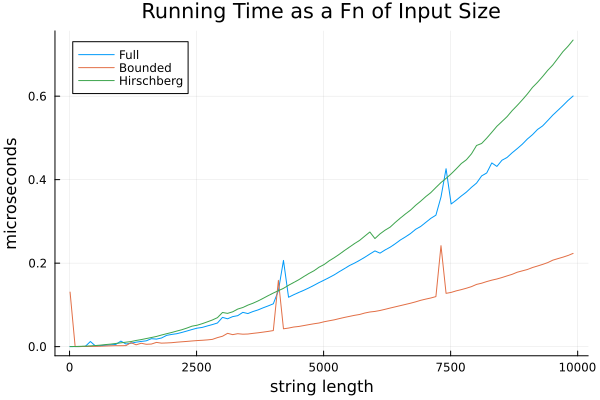

In [9]:
Plots.plot(10:100:10000, time',
           title = "Running Time as a Fn of Input Size", 
           xlabel = "string length", 
           ylabel="microseconds", 
           label = ["Full" "Bounded" "Hirschberg"])

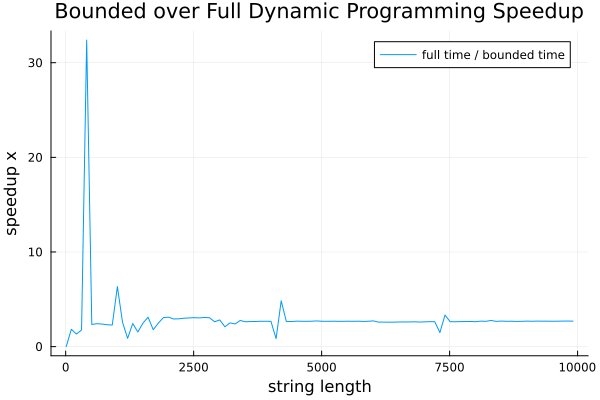

In [10]:
Plots.plot(10:100:10000, time[1,:]./time[2,:],
           title = "Bounded over Full Dynamic Programming Speedup",
           xlabel = "string length",
           ylabel = "speedup x",
           label = "full time / bounded time")

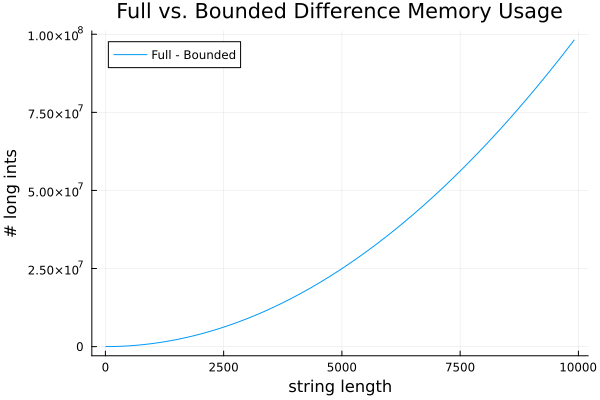

In [28]:
Plots.plot(10:100:10000, (memory[1,:] - memory[2,:])/8,
           title  = "Full vs. Bounded Difference Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label  = "Full - Bounded")

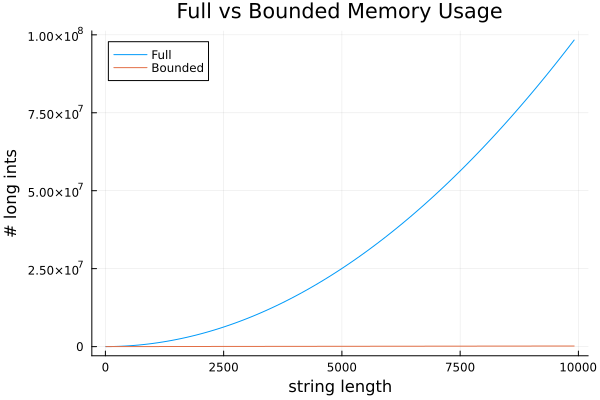

In [29]:
Plots.plot(10:100:10000, memory[1:2, :]'/8,
           title = "Full vs Bounded Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label = ["Full" "Bounded"])

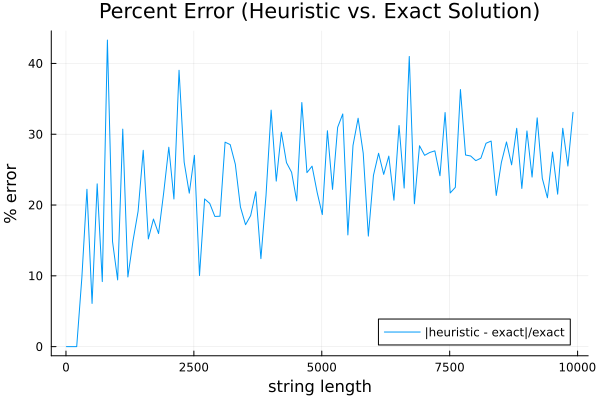

In [33]:
Plots.plot(10:100:10000, abs.(error') * 100,
           title = "Percent Error (Heuristic vs. Exact Solution)",
           xlabel = "string length",
           ylabel = "% error",
           label = "|heuristic - exact|/exact")